In [10]:
import mlflow
import mlflow.sklearn
import json

DATA_DIR = "../data"

# Set tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")  

# run_id = "42c00ef221ef48538e51edbfb8ffc984"

# model = mlflow.sklearn.load_model(f"runs:/{run_id}/early_diagnosis")

logged_model = 'runs:/7f5c74ea4c054ffd8e9a99108d9028c6/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(logged_model)


In [28]:
loaded_model.named_steps

{'preprocessor': ColumnTransformer(transformers=[('both', MissingIndicator(features='all'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020357668BD0>),
                                 ('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000203575AB350>),
                                 ('cat',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot',
                                                   OneHotEncoder(drop='if_binary',
                                                 

In [9]:
loaded_model.feature_names_in_

array(['Pat_PMI', 'Blo_NT', 'Pat_DM', 'Sym_DAR', 'Phy_Hei', 'Sym_CPR',
       'Pat_Hyp', 'Pat_CABG', 'Pat_AF', 'Phy_Sex', 'Phy_Age', 'Blo_Cre',
       'Phy_Wei', 'Med_LD'], dtype=object)

In [16]:
import pandas as pd

test_examples_df = pd.read_csv(os.path.join(DATA_DIR, "raw", "NT_top_10_test.csv"), index_col=[0, 1])

In [17]:
test_examples_df

,,Pat_PMI,Blo_NT,Pat_DM,Sym_DAR,Phy_Hei,Sym_CPR,Pat_Hyp,Pat_CABG,Pat_AF,Phy_Sex,Phy_Age,Blo_Cre,Phy_Wei,Med_LD
patid,date,,,,,,,,,,,,,,
46533220088,2018-08-31,N,1186.0,N,NaN,NaN,NaN,Y,N,N,Female,68.709589,77.0,51.0,NaN
5578750421318,2014-05-31,N,97.5,N,NaN,NaN,NaN,N,N,Y,Male,78.465753,68.0,NaN,NaN
5591912621301,2011-11-30,N,652.0,N,NaN,NaN,NaN,N,N,N,Female,53.947945,208.0,58.2,NaN


In [18]:
loaded_model.predict_proba(test_examples_df)

array([[0.26, 0.74],
       [0.7 , 0.3 ],
       [0.21, 0.79]])

In [33]:
imputer = loaded_model['preprocessor']

imputed_test_examples_df = pd.DataFrame(imputer.transform(test_examples_df), columns=imputer.get_feature_names_out(), index=test_examples_df.index)

(5591912621301, '2011-11-30')


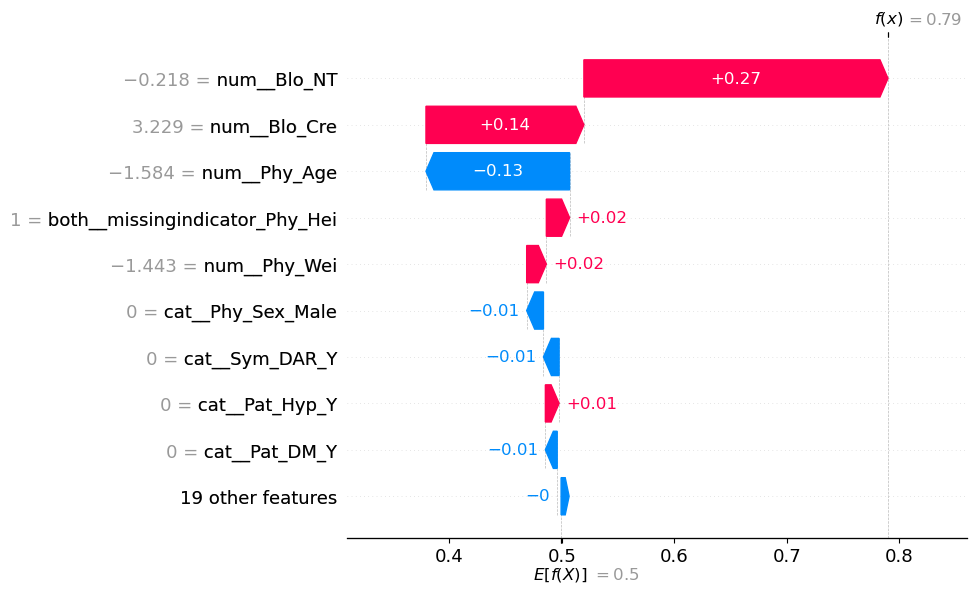

In [45]:
import shap

explainer = shap.TreeExplainer(loaded_model["classifier"])
i = 2
print(imputed_test_examples_df.index[i])
shap_values = explainer(imputed_test_examples_df)
shap.waterfall_plot(shap_values[i,: , 1])

.values =
array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.49678425e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.74842995e-04,
       -4.61476936e-04,  0.00000000e+00,  4.14709983e-01, -4.48319476e-03,
       -9.73597387e-02, -9.83649716e-03,  2.60955371e-03, -7.02112885e-03,
       -1.37292026e-03, -9.15374383e-03, -1.28113801e-02, -2.33199273e-05,
       -2.99843839e-03, -8.57542701e-04, -1.25994632e-02, -1.98157070e-02])

.base_values =
0.49950338828765045

.data =
array([ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        , -0.04949408,
       -0.01472433, -0.35028613, -0.39754544, -1.84859752, -0.40004693,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])